# **1. Segmentation**
Segmentation은 컴퓨터 비전에서 이미지나 영상을 픽셀 단위로 분할하여 각 영역이 무엇을 나타내는지 구분하는 기술입니다. 이는 크게 Semantic Segmentation과 Instance Segmentation으로 나뉘는데, Semantic Segmentation은 같은 종류의 객체를 동일한 클래스로 분류하는 반면, Instance Segmentation은 같은 클래스 내에서도 개별 객체를 구분합니다. 이를 통해 의료 영상 분석, 자율주행, 위성 이미지 처리 등 다양한 분야에서 정밀한 객체 인식을 수행할 수 있습니다. Segmentation 모델로는 U-Net, DeepLab, Mask R-CNN 등이 널리 사용됩니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbUla0i%2FbtsMEoFBBFg%2FAAAAAAAAAAAAAAAAAAAAANsTt4jCSTsz_hIMnLIvRyfxueUeIt8B9HAc77CCnSYm%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1756652399%26allow_ip%3D%26allow_referer%3D%26signature%3D9uWb%252B0cOXOPhv7SH5psPKo9bIKA%253D'>

In [1]:
!pip install -q ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.9 MB/s eta 0:00:00


In [2]:
import os
import random
import shutil
import ultralytics
import cv2
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from pycocotools import mask as maskUtils
from torchvision import transforms

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!mkdir /content/starbucks

In [4]:
!unzip /content/starbucks.zip -d /content/starbucks

Archive:  /content/starbucks.zip
  inflating: /content/starbucks/instances_default.json  
  inflating: /content/starbucks/starbucks11.jpg  
  inflating: /content/starbucks/starbucks12.jpg  
  inflating: /content/starbucks/starbucks13.jpg  
  inflating: /content/starbucks/starbucks14.jpg  
  inflating: /content/starbucks/starbucks15.jpg  
  inflating: /content/starbucks/starbucks16.jpg  
  inflating: /content/starbucks/starbucks17.jpg  
  inflating: /content/starbucks/starbucks18.jpg  
  inflating: /content/starbucks/starbucks19.jpg  
  inflating: /content/starbucks/starbucks20.jpg  
  inflating: /content/starbucks/starbucks21.jpg  
  inflating: /content/starbucks/starbucks22.jpg  
  inflating: /content/starbucks/starbucks23.jpg  
  inflating: /content/starbucks/starbucks24.jpg  
  inflating: /content/starbucks/starbucks25.jpg  
  inflating: /content/starbucks/starbucks26.jpg  
  inflating: /content/starbucks/starbucks27.jpg  
  inflating: /content/starbucks/starbucks28.jpg  
  inflatin

In [5]:
data_root = '/content/starbucks'

In [6]:
data_list = glob.glob(f'{data_root}/*.jpg') + glob.glob(f'{data_root}/*.jpeg')
data_list

['/content/starbucks/starbucks28.jpg',
 '/content/starbucks/starbucks14.jpg',
 '/content/starbucks/starbucks22.jpg',
 '/content/starbucks/starbucks39.jpg',
 '/content/starbucks/starbucks38.jpg',
 '/content/starbucks/starbucks36.jpg',
 '/content/starbucks/starbucks33.jpg',
 '/content/starbucks/starbucks37.jpg',
 '/content/starbucks/starbucks20.jpg',
 '/content/starbucks/starbucks34.jpg',
 '/content/starbucks/starbucks15.jpg',
 '/content/starbucks/starbucks23.jpg',
 '/content/starbucks/starbucks26.jpg',
 '/content/starbucks/starbucks29.jpg',
 '/content/starbucks/starbucks19.jpg',
 '/content/starbucks/starbucks21.jpg',
 '/content/starbucks/starbucks13.jpg',
 '/content/starbucks/starbucks32.jpg',
 '/content/starbucks/starbucks40.jpg',
 '/content/starbucks/starbucks12.jpg',
 '/content/starbucks/starbucks11.jpg',
 '/content/starbucks/starbucks30.jpg',
 '/content/starbucks/starbucks35.jpg',
 '/content/starbucks/starbucks31.jpg',
 '/content/starbucks/starbucks18.jpg',
 '/content/starbucks/star

In [7]:
def load_coco_annotations(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data

In [8]:
load_coco_annotations(f'{data_root}/instances_default.json')

{'licenses': [{'name': '', 'id': 0, 'url': ''}],
 'info': {'contributor': '',
  'date_created': '',
  'description': '',
  'url': '',
  'version': '',
  'year': ''},
 'categories': [{'id': 1, 'name': 'logo', 'supercategory': ''},
  {'id': 2, 'name': 'text', 'supercategory': ''}],
 'images': [{'id': 1,
   'width': 236,
   'height': 214,
   'file_name': 'starbucks11.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 2,
   'width': 201,
   'height': 251,
   'file_name': 'starbucks12.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 3,
   'width': 395,
   'height': 128,
   'file_name': 'starbucks13.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 4,
   'width': 301,
   'height': 167,
   'file_name': 'starbucks14.jpg',
   'license': 0,
   'flickr_url': '',
   'coco_url': '',
   'date_captured': 0},
  {'id': 5,
   'width': 275,
   'height': 183,
   'file_n

In [9]:
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f'이미지를 찾을 수 없음: {image_path}')
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

array([[[100,  81,  64],
        [ 97,  76,  57],
        [103,  76,  55],
        ...,
        [177, 144, 135],
        [177, 144, 135],
        [177, 144, 135]],

       [[ 99,  73,  58],
        [ 92,  63,  49],
        [ 97,  64,  49],
        ...,
        [182, 146, 130],
        [182, 146, 130],
        [182, 146, 130]],

       [[130,  93,  75],
        [117,  78,  61],
        [122,  78,  65],
        ...,
        [189, 157, 136],
        [189, 157, 136],
        [189, 157, 136]],

       ...,

       [[160,  72,  32],
        [134,  47,   4],
        [143,  55,   7],
        ...,
        [ 66,  45,  42],
        [ 66,  45,  42],
        [ 66,  45,  42]],

       [[211,  99,  17],
        [211, 101,   4],
        [211, 103,   0],
        ...,
        [ 59,  42,  50],
        [ 59,  42,  50],
        [ 59,  42,  50]],

       [[222, 110,  24],
        [222, 112,  14],
        [222, 115,   1],
        ...,
        [ 59,  42,  50],
        [ 59,  42,  50],
        [ 59,  42,  50]]], dtype=uint8)
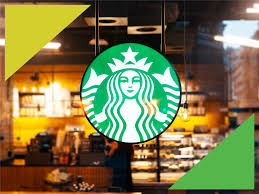

In [10]:
load_image(data_list[2])

In [11]:
def draw_annotations(image, annotations, image_id):
    for ann in annotations:
        if ann['image_id'] == image_id and 'segmentation' in ann:
            segmentation = ann['segmentation']

            for seg in segmentation:
                if isinstance(seg, list) and len(seg) >= 6:
                    points = np.array(seg).reshape(-1, 2).astype(np.int32)
                    cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    return image

In [12]:
def visualize_coco(json_path, image_folder, image_id):
    coco_data = load_coco_annotations(json_path)
    image_info = next((img for img in coco_data['images'] if img['id'] == image_id), None)
    if not image_info:
        raise ValueError(f'Image ID {image_id} not found in COCO JSON file')

    image_path = os.path.join(image_folder, image_info['file_name'])
    image = load_image(image_path)
    annotated_image = draw_annotations(image, coco_data['annotations'], image_id)

    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.title(f'Image ID: {image_id} with Annotations')
    plt.show()

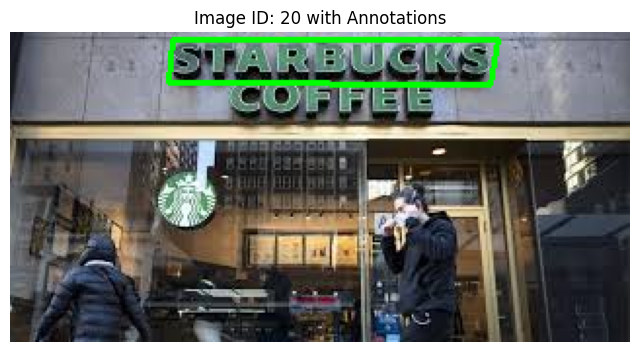

In [13]:
visualize_coco(f'{data_root}/instances_default.json', f'{data_root}', 20)

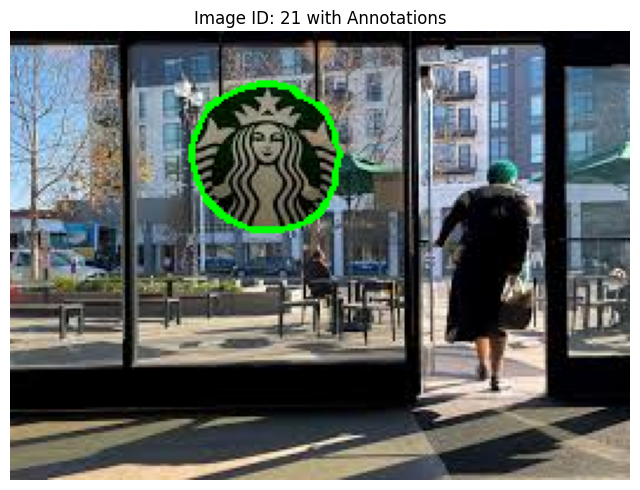

In [14]:
visualize_coco(f'{data_root}/instances_default.json', f'{data_root}', 21)

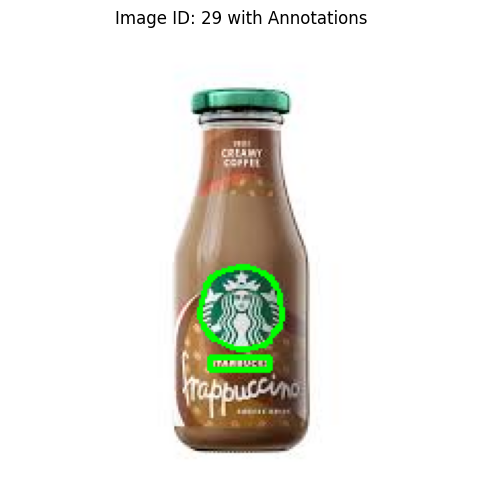

In [15]:
visualize_coco(f'{data_root}/instances_default.json', f'{data_root}', 29)

In [16]:
coco_json_path = f'{data_root}/instances_default.json'
yolo_output_folder = f'{data_root}'
image_folder = f'{data_root}'

with open(coco_json_path, 'r') as f:
    coco_data = json.load(f)

image_dict = {img['id']: img for img in coco_data['images']}
image_dict

{1: {'id': 1,
  'width': 236,
  'height': 214,
  'file_name': 'starbucks11.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 2: {'id': 2,
  'width': 201,
  'height': 251,
  'file_name': 'starbucks12.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 3: {'id': 3,
  'width': 395,
  'height': 128,
  'file_name': 'starbucks13.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 4: {'id': 4,
  'width': 301,
  'height': 167,
  'file_name': 'starbucks14.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 5: {'id': 5,
  'width': 275,
  'height': 183,
  'file_name': 'starbucks15.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 6: {'id': 6,
  'width': 299,
  'height': 168,
  'file_name': 'starbucks16.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 7: {'id': 7,
  'width': 275,
  'height': 183,
  'fi

In [17]:
for ann in coco_data['annotations']:
    image_id = ann['image_id']
    category_id = ann['category_id'] - 1
    segmentation = ann['segmentation']

    image_info = image_dict.get(image_id)
    if not image_info:
        continue

    img_width, img_height = image_info['width'], image_info['height']
    # os.path.splitext: 파일 경로에서 확장자를 분리
    yolo_label_path = os.path.join(yolo_output_folder, f"{os.path.splitext(image_info['file_name'])[0]}.txt")

    yolo_lines = []

    for seg in segmentation:
        if isinstance(seg, list) and len(seg) >= 6:
            normalized_points = [
                (seg[i] / img_width, seg[i+1] / img_height) for i in range(0, len(seg), 2)
            ]
            yolo_line = f'{category_id} ' + ' '.join([f'{x:.6f} {y:6f}' for x, y in normalized_points])
            yolo_lines.append(yolo_line)

    if yolo_lines:
        with open(yolo_label_path, 'w') as f:
            f.write('\n'.join(yolo_lines))

print('coco -> yolo 변환 완료!')

coco -> yolo 변환 완료!


In [18]:
random.seed(2025)

data_list = glob.glob(f'{data_root}/*.jpg') + glob.glob(f'{data_root}/*.jpeg')

random.shuffle(data_list)
test_ratio = 0.2
num_data = len(data_list)
num_data

30

In [19]:
test_list = data_list[:int(num_data*test_ratio)]
valid_list = data_list[int(num_data*test_ratio):int(num_data*test_ratio)*2]
train_list = data_list[int(num_data*test_ratio)*2:]

len(test_list), len(valid_list), len(train_list)

(6, 6, 18)

In [20]:
file_root = f'{data_root}'
train_root = f'{data_root}/train'
valid_root = f'{data_root}/valid'
test_root = f'{data_root}/test'

for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [21]:
def copy_files(file_list, dest_folder):
    for file_path in file_list:
        file_name = os.path.basename(file_path)
        file_base, ext = os.path.splitext(file_name)

        dest_path = os.path.join(dest_folder, file_name)
        shutil.copy(file_path, dest_path)

        txt_file_path = os.path.join(os.path.dirname(file_path), f'{file_base}.txt')
        if os.path.exists(txt_file_path):
            dest_txt_path = os.path.join(dest_folder, f'{file_base}.txt')
            shutil.copy(txt_file_path, dest_txt_path)

In [22]:
copy_files(train_list, train_root)
copy_files(valid_list, valid_root)
copy_files(test_list, test_root)

In [23]:
train_root = f'/content/starbucks/train'
valid_root = f'/content/starbucks/valid'
test_root = f'/content/starbucks/test'

In [32]:
import yaml

In [33]:
data = dict()
data['train'] = train_root
data['val'] = valid_root
data['test'] = test_root
data['nc'] = 2
data['names'] = ['logo', 'text']

with open(f'./starbucks/starbucks.yaml', 'w') as f:
    yaml.dump(data, f)

In [34]:
from ultralytics import YOLO

In [35]:
model = YOLO('yolov8s-seg.pt')

In [36]:
results = model.train(
    data='./starbucks/starbucks.yaml',
    epochs = 10,
    batch=4,
    imgsz=224,
    device=0,
    workers=2,
    amp=False,
    name='starbucks_s'
)

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=False, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./starbucks/starbucks.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=starbucks_s2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /content/starbucks/train.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 179.7±107.9 MB/s, size: 9.3 KB)


val: Scanning /content/starbucks/valid.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]


Plotting labels to runs/segment/starbucks_s2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/segment/starbucks_s2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.807G      2.496      3.717      4.497      1.977          2        224: 100%|██████████| 5/5 [00:00<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.79it/s]

                   all          6          6      0.746        0.2       0.19      0.167      0.746        0.2       0.19      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.807G      1.163      1.946      2.036      1.163          2        224: 100%|██████████| 5/5 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.83it/s]

                   all          6          6      0.661        0.3      0.288      0.233      0.661        0.3      0.284      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.832G     0.8728      1.455      2.194      1.024          2        224: 100%|██████████| 5/5 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          6          6      0.671        0.3      0.288      0.247      0.671        0.3      0.287      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.834G      1.095      1.781      1.483      1.077          2        224: 100%|██████████| 5/5 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all          6          6      0.247      0.197      0.151      0.118      0.247      0.197      0.151      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.873G      1.053      1.532      1.976      1.039          2        224: 100%|██████████| 5/5 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all          6          6      0.117        0.4      0.134     0.0957      0.117        0.4      0.134     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.912G      1.106      1.719      1.886      1.116          2        224: 100%|██████████| 5/5 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.44it/s]

                   all          6          6      0.341        0.3      0.234      0.196      0.341        0.3      0.234      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.912G      1.017      1.399      1.752      1.085          2        224: 100%|██████████| 5/5 [00:00<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.94it/s]

                   all          6          6      0.178        0.4      0.281      0.223      0.178        0.4      0.281      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.953G      1.114      1.417      1.358       1.02          2        224: 100%|██████████| 5/5 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]

                   all          6          6      0.178        0.4      0.281      0.223      0.178        0.4      0.281      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.953G     0.9684      1.193      1.429      1.081          2        224: 100%|██████████| 5/5 [00:00<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]

                   all          6          6       0.28        0.4      0.328      0.259       0.28        0.4      0.328      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.07G      0.913       1.29      1.504     0.9286          2        224: 100%|██████████| 5/5 [00:00<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]


                   all          6          6      0.308        0.5      0.352      0.288      0.308        0.5      0.352      0.267

10 epochs completed in 0.004 hours.
Optimizer stripped from runs/segment/starbucks_s2/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/starbucks_s2/weights/best.pt, 23.8MB

Validating runs/segment/starbucks_s2/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,374 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]


                   all          6          6      0.308        0.5      0.352      0.288      0.308        0.5      0.352      0.267
                  logo          5          5      0.615          1      0.703      0.576      0.615          1      0.703      0.534
                  text          1          1          0          0          0          0          0          0          0          0
Speed: 0.1ms preprocess, 4.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/starbucks_s2


In [38]:
model = YOLO('runs/segment/starbucks_s2/weights/best.pt')

In [39]:
results = model.predict(
    source='./starbucks/test',
    imgsz=224,
    conf=0.30,
    device=0,
    save=True,
    save_conf=True
)


image 1/6 /content/starbucks/test/starbucks12.jpg: 224x192 19 logos, 1 text, 13.0ms
image 2/6 /content/starbucks/test/starbucks17.jpg: 160x224 1 logo, 17 texts, 10.2ms
image 3/6 /content/starbucks/test/starbucks18.jpg: 160x224 1 logo, 8.7ms
image 4/6 /content/starbucks/test/starbucks20.jpg: 192x224 1 logo, 3 texts, 10.3ms
image 5/6 /content/starbucks/test/starbucks30.jpg: 128x224 1 logo, 2 texts, 12.3ms
image 6/6 /content/starbucks/test/starbucks34.jpg: 160x224 2 logos, 10.4ms
Speed: 0.7ms preprocess, 10.8ms inference, 2.2ms postprocess per image at shape (1, 3, 160, 224)
Results saved to runs/segment/predict2
